In [1]:
import matplotlib.pyplot as plt
plt.rc("figure", figsize=[12,8])
plt.rc("font", size=8)
from math import pi, sqrt
import KSP_module as ksp
from KSP_module import Kerbol, Kerbin, Duna, Eve, Mun, Minmus, Moho

KSP module loaded
All tests passed


# Calculate Hohmann transfer orbits from Kerbin (Earth analog) to Duna (Mars analog)

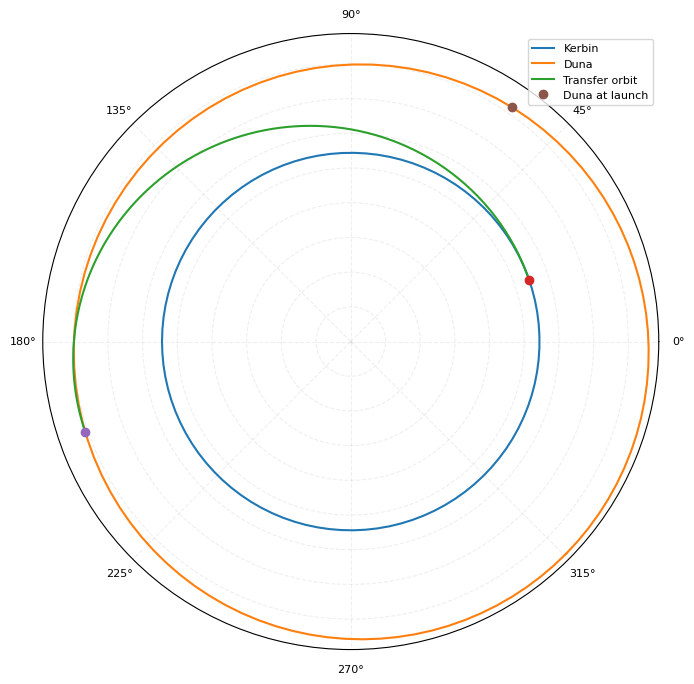

['Y1 D236 03:06:31', np.float64(5087190.725463567)]


In [2]:
transfer1 = ksp.calc_window(Kerbin.orbit, Duna.orbit, 0)
fig,ax = ksp.plot_hohmann_orbit(Kerbin, Duna, transfer1)
plt.show()
print([ksp.pretty_date(transfer1.t_launch), transfer1.t_launch])

# Hohmann transfer orbit from Kerbin (Earth analog) to Eve (Venus analog)

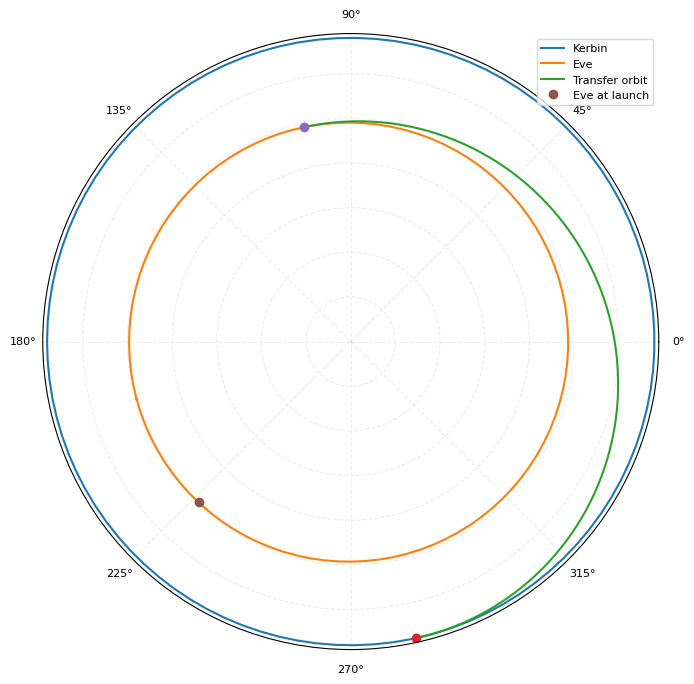

['Y2 D122 01:54:30', np.float64(11824014.451496078)]


In [3]:
transfer2 = ksp.calc_window(Kerbin.orbit, Eve.orbit, 0)
fig,ax = ksp.plot_hohmann_orbit(Kerbin, Eve, transfer2)
plt.show()
print([ksp.pretty_date(transfer2.t_launch), transfer2.t_launch])


# Hohmann transfer orbit from low Kerbin orbit (100 m above top of atmosphere) to Mun (Luna analog)

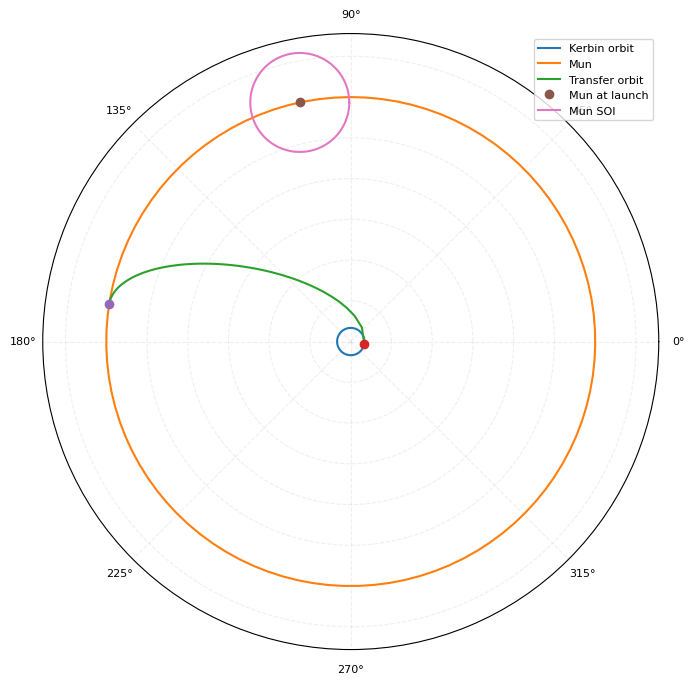

['Y1 D1 00:29:49', np.float64(1789.0862098056393)]


In [6]:
LKO = ksp.orbit(Kerbin, min_alt = 70000.1, e=0)
transfer3 = ksp.calc_window(LKO, Mun.orbit, 0)
fig,ax = ksp.plot_hohmann_orbit(LKO, Mun, transfer3)
ax = ksp.add_soi_to_plot(ax, Mun, transfer3.t_launch, label=True)
plt.show()
print([ksp.pretty_date(transfer3.t_launch), transfer3.t_launch])

# First 3 launch windows from Kerbin (Earth analog) to Moho (Mercury analog)

In [5]:
t0 = 0
for i in range(3):
    transfer = ksp.calc_window(Kerbin.orbit, Moho.orbit, t0)
    dv = ksp.calc_hohmann_dv(transfer, LKO)
    min_dist = transfer.calc_distance_to(Moho, transfer.t_arrival)
    print(f'Time of launch: {ksp.pretty_date(transfer.t_launch)}')
    print(f'Time of arrival: {ksp.pretty_date(transfer.t_arrival)}')
    print(f"Minimum distance to Moho at arrival: {min_dist/1e6:.2f} M km")
    print(f"Delta-v needed for transfer from LKO to Moho: {dv:.2f} m/s")
    print('-------------------')
    t0 = transfer.t_launch + 1000
    print(t0)

Time of launch: Y1 D45 04:36:36
Time of arrival: Y1 D159 01:04:11
Minimum distance to Moho at arrival: 318.74 M km
Delta-v needed for transfer from LKO to Moho: 9333.42 m/s
-------------------
967995.5817343396
Time of launch: Y1 D158 05:15:34
Time of arrival: Y1 D285 00:16:41
Minimum distance to Moho at arrival: 496.01 M km
Delta-v needed for transfer from LKO to Moho: 6307.93 m/s
-------------------
3411133.7833153326
Time of launch: Y1 D311 05:35:56
Time of arrival: Y2 D10 05:25:14
Minimum distance to Moho at arrival: 662.23 M km
Delta-v needed for transfer from LKO to Moho: 6519.79 m/s
-------------------
6717156.363078868


# TODO: example SOI change calculation